# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: I__

__Nombres de los estudiantes: Itziar López Almagro y Adrian Carlos Skaczylo Sawicka__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



__Solución__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree

RANDOM_STATE=3


C:\Users\Adrian\AppData\Local\Temp\ipykernel_29104\3749822427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cargamos los datos en el data frame y hemos decidido eliminar, a parte de los datos nulos, aquellos datos que representen personas muertas,i.e, persona que tengan 0 colesterol o 0 pulsaciones en reposo

In [2]:
df = pd.read_csv('heart_failure.csv') #Creamos el data Frame
df=df.dropna() #Eliminamos las filas que contengan al menos un valor nulo
#Eliminamos personas muertas
df=df[df['Cholesterol']>0]
df=df[df['RestingBP']>0]
df=df.reset_index(drop=True) #Ajustamos la indexacion
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
742,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
743,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
744,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.


__Solución__


Para ver si las clases a predecir estan equilibrados vamos a representar el histograma de la variable y comparar la frecuencia de las clases:



<Axes: >

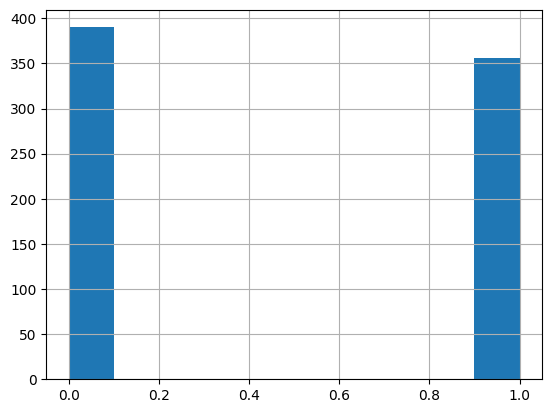

In [3]:
df['HeartDisease'].hist()

En el diagrama de frecuencias, se evidencia que las clases de la variable de salida 'HeartDisease' están balanceadas, ya que se observa aproximadamente la misma cantidad de datos para ambos valores (0 y 1). Esto sugiere que nuestro conjunto de datos cuenta con una distribución equilibrada entre personas que padecen una enfermedad cardíaca y aquellas que no la padecen. Este equilibrio en las clases es crucial para que nuestro modelo de aprendizaje automático pueda generalizar correctamente el conocimiento y producir predicciones precisas. Si las clases no estuvieran equilibradas, el modelo podría verse sesgado hacia la clase dominante, lo que afectaría su capacidad para identificar correctamente casos positivos y negativos de enfermedades cardíacas. Por lo tanto, el hecho de que las clases estén equilibradas en nuestro conjunto de datos es un aspecto positivo que favorece la capacidad predictiva de nuestro modelo.


### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).





__Solución__


Antes de entrar en detalles hemos decidido mapear las variables categóricas. Para ellos hemos de saber que valores toma cada una de las variables; y una vez lo sepamos realizamos el mapeo correspondiente:



In [4]:
valores_unicos_1 = df['RestingECG'].unique()
valores_unicos_2=df['ChestPainType'].unique()
valores_unicos_3=df['ExerciseAngina'].unique()
valores_unicos_4=df['ST_Slope'].unique()
valores_unicos_5=df['Sex'].unique()
print(valores_unicos_1)
print(valores_unicos_2)
print(valores_unicos_3)
print(valores_unicos_4)
print(valores_unicos_5)

['Normal' 'ST' 'LVH']
['ATA' 'NAP' 'ASY' 'TA']
['N' 'Y']
['Up' 'Flat' 'Down']
['M' 'F']


In [5]:
#Realizamos mapeo
mapeo_1 = {'Normal':0,'ST':1, 'LVH':2}
mapeo_2={'ATA':0,'NAP':1,'ASY':2,'TA':3}
mapeo_3={'N':0,'Y':1}
mapeo_4={'Up':0,'Flat':1,'Down':2}
mapeo_5={'M':0,'F':1}

df_copy=df.copy() 
df['RestingECG'] = df['RestingECG'].map(mapeo_1)
df['ChestPainType'] = df['ChestPainType'].map(mapeo_2)
df['ExerciseAngina'] = df['ExerciseAngina'].map(mapeo_3)
df['ST_Slope'] = df['ST_Slope'].map(mapeo_4)
df['Sex'] = df['Sex'].map(mapeo_5)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,0,3,110,264,0,0,132,0,1.2,1,1
742,68,0,2,144,193,1,0,141,0,3.4,1,1
743,57,0,2,130,131,0,0,115,1,1.2,1,1
744,57,1,0,130,236,0,2,174,0,0.0,1,1


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
Sex,746.0,0.243968,0.429762,0.0,0.00,0.0,0.0,1.0
ChestPainType,746.0,1.383378,0.890181,0.0,1.00,2.0,2.0,3.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
RestingECG,746.0,0.639410,0.838664,0.0,0.00,0.0,1.0,2.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
ExerciseAngina,746.0,0.384718,0.486855,0.0,0.00,0.0,1.0,1.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2


- Edad

<Axes: >

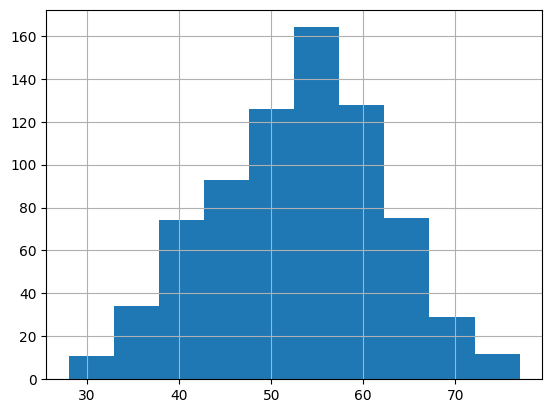

In [7]:
df['Age'].hist()

Podemos observar que la media de edad en nuestra muestra es 53.51 y que la desviación típica es 9.43 por lo que los datos recogidos son de personas con edad relativamente semejante: media/alta edad

- Colesterol

<Axes: >

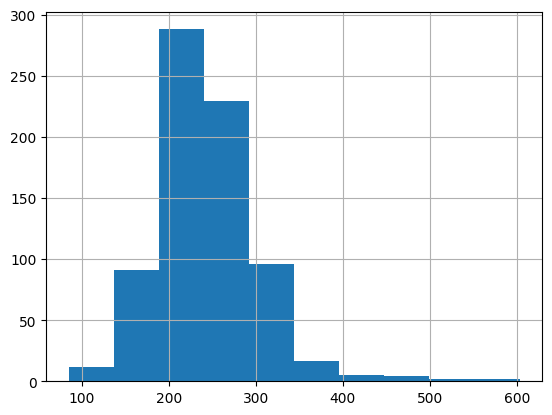

In [8]:
df['Cholesterol'].hist()


Vemos en el diagrama, y el percentil 25% en la tabla de datos, que la mayoria de las personas tienen el colesterol bastante  alto, teniendo en cuenta que se considera un nivel alto a partir de 160. Esto, sumado al equilibrio entre personas enfermas y no enfermas, indica que la variable colesterol no es una variable "determinante" en el sentido de que un colesterol alto no implica una enfermedad cardiaca. Sin embargo,  como veremos mas adelante, las personas enfermas suelen tener el colesterol alto




- Correlacion


Además de mirar una a una cada variable, tambien es interesante ver la relacion entre ellas. Para ello veamos la correlacion de cada par de variables:


In [9]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.040917,0.238372,0.259865,0.058758,0.241338,0.230374,-0.382112,0.245908,0.286006,0.285421,0.298617
Sex,-0.040917,1.000000,-0.171133,-0.034363,0.107045,-0.096075,0.013509,0.157002,-0.192579,-0.125743,-0.142808,-0.292779
ChestPainType,0.238372,-0.171133,1.000000,0.113377,0.034241,0.097147,0.147663,-0.275872,0.359181,0.358451,0.381494,0.442023
RestingBP,0.259865,-0.034363,0.113377,1.000000,0.095939,0.173765,0.062151,-0.125774,0.161035,0.198575,0.143881,0.173242
Cholesterol,0.058758,0.107045,0.034241,0.095939,1.000000,0.054012,0.067802,-0.019856,0.086768,0.058488,0.078516,0.103866
FastingBS,0.241338,-0.096075,0.097147,0.173765,0.054012,1.000000,0.133075,-0.102710,0.109995,0.055568,0.157780,0.160594
RestingECG,0.230374,0.013509,0.147663,0.062151,0.067802,0.133075,1.000000,0.025448,0.047632,0.125211,0.108808,0.113261
MaxHR,-0.382112,0.157002,-0.275872,-0.125774,-0.019856,-0.102710,0.025448,1.000000,-0.396289,-0.259533,-0.349926,-0.377212
ExerciseAngina,0.245908,-0.192579,0.359181,0.161035,0.086768,0.109995,0.047632,-0.396289,1.000000,0.465491,0.473543,0.551834
Oldpeak,0.286006,-0.125743,0.358451,0.198575,0.058488,0.055568,0.125211,-0.259533,0.465491,1.000000,0.613961,0.495696


En la matriz de correlación podemos observar que no hay ningún par de variables altamente relacionadas luego todas las variables nos aportan información adicional y no tenemos que eliminar ninguna de nuestro dataframe.

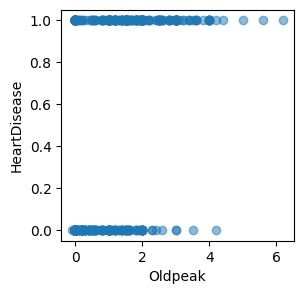

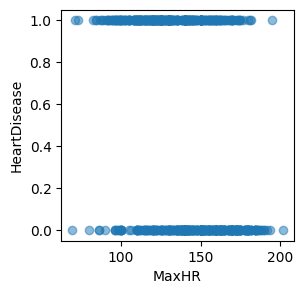

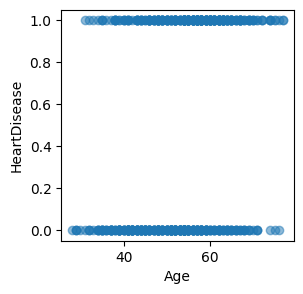

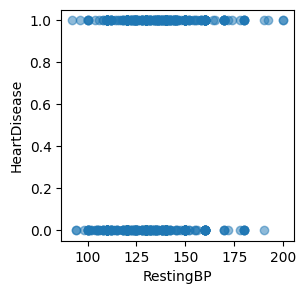

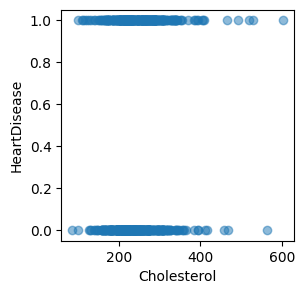

<Figure size 640x480 with 0 Axes>

In [10]:
variables_list={'Age','RestingBP','Cholesterol','MaxHR','Oldpeak'}
target_variable='HeartDisease'
for var in variables_list:
    plt.figure(figsize=(3, 3))
    plt.scatter(df[var], df[target_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.show()

plt.tight_layout()
plt.show()

Podemos observar en el diagrama de dispersión que relaciona 'HeartDisease' con 'Cholesterol' que hay una tendencia para que las personas con niveles más altos de colesterol también tiendan a tener una enfermedad cardíaca. Además, en el diagrama de dispersión que muestra la relación entre la variable 'HeartDisease' y 'MaxHR', se puede ver que las personas con una frecuencia cardíaca más baja durante el ejercicio intenso también tienen una mayor propensión a sufrir enfermedades cardíacas. Por otro lado, aquellos individuos con un 'Oldpeak' muy bajo o muy alto también parecen tener una mayor probabilidad de padecer enfermedades cardiovasculares.

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

__Solución__

Vamos a representar el histograma de las variables categóricas:

<Axes: >

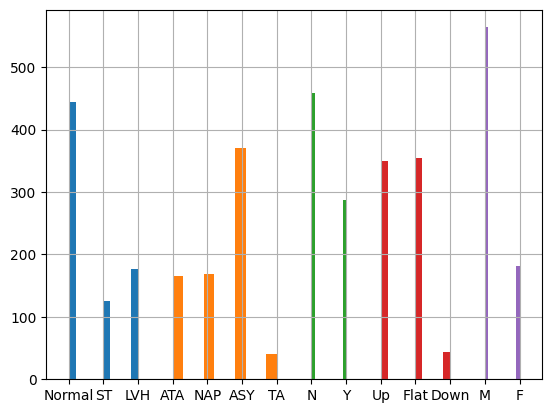

In [11]:
df_copy['RestingECG'].hist()
df_copy['ChestPainType'].hist()
df_copy['ExerciseAngina'].hist()
df_copy['ST_Slope'].hist()
df_copy['Sex'].hist()

En el conjunto de datos, se observa que la mayoría de los individuos son hombres, lo que sugiere un desequilibrio de género en la muestra. Además, la mayoría de las personas en la muestra tienen un resultado de 'RestingECG' normal, lo que indica que la actividad cardíaca en reposo de la mayoría de los individuos es normal. Por otro lado, la mayoría de las personas en la muestra han experimentado un tipo de dolor clasificado como 'ASY'. Además, en cuanto a la variable 'ST_slope', la tendencia general es que sea clasificada como 'Up' o 'Flat', lo que puede indicar cierta uniformidad en la respuesta del segmento ST durante el ejercicio entre los individuos en el conjunto de datos.

## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


__Solución__

Primero, dividimos nuestros datos: 4/5 para el entrenamiento y 1/5 para test. Luego ajustaremos cada modelo de aprendizaje con los datos de entrenamiento para finalmente dar una evalucación de cada modelo con los datos del test.

In [12]:
x = df.drop(columns=['HeartDisease']).values
y = df['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)


## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

__Solución:__
AL tratarse de un árbol de decision, no es necesario reescalar los datos

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.


__Solución__

Primero probaremos a crear varios modelos con distintas alturas y despues los compararemos

In [14]:
train_accuracy_arbol = []
test_accuracy_arbol= []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths:
    clf_arbol = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf_arbol, x, y, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy_arbol.append(np.mean(scores['train_score']))
    test_accuracy_arbol.append(np.mean(scores['test_score']))
    

print(train_accuracy_arbol)
print(test_accuracy_arbol)

[0.8243881289475553, 0.8276661521538571, 0.8592441540699738, 0.8766710577673692, 0.8979678961748633, 0.9203132762046697, 0.9401235717834078, 0.9612742619402456, 0.9725937655240934]
[0.8236936936936937, 0.805027027027027, 0.8265225225225226, 0.8265585585585585, 0.8159279279279279, 0.811855855855856, 0.7957837837837838, 0.7783063063063064, 0.785027027027027]


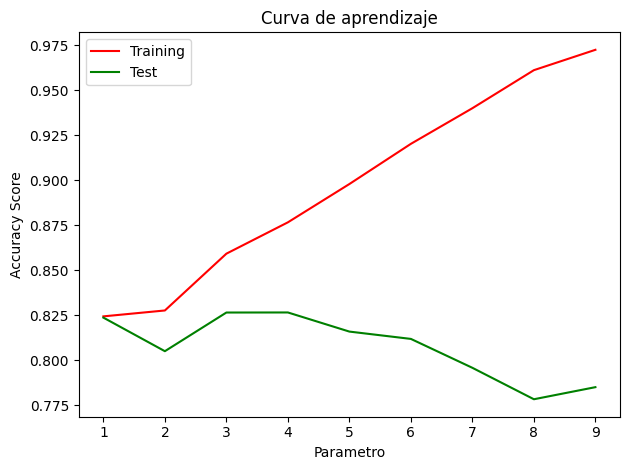

In [15]:
# Draw lines
plt.plot(max_depths, train_accuracy_arbol, color="r",  label="Training")
plt.plot(max_depths, test_accuracy_arbol, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos observar en el gráfico que la profundidad ideal para el árbol será 3 pues a mayor profundidad menor es la precisión en el test con datos nuevos;es decir con una mayor profundidad el modelo está sobreaprendiendo.



Veamos como se comporta el arbol para una altura 3:


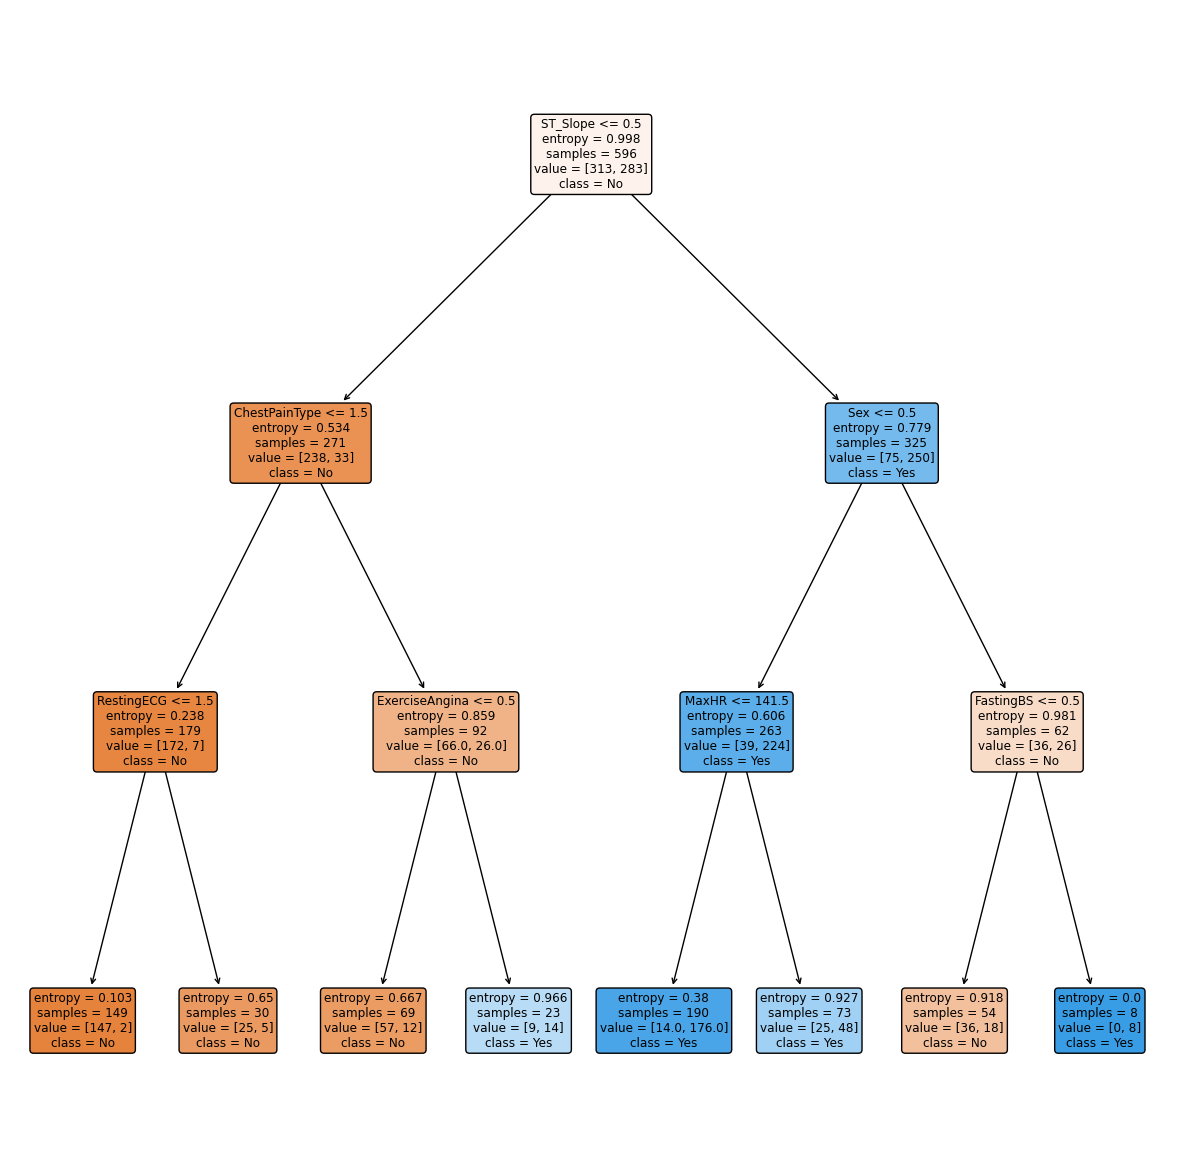

In [16]:
clf_arbol3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf_arbol3.fit(X_train, y_train)
plt.figure(figsize=(15,15))
plot_tree(clf_arbol3, filled=True, feature_names=df.columns, class_names=['No','Yes'], rounded=True)
plt.show()



Observamos que hay una hoja, en el que 8 muestras son clasificadas perfectamente como personas enfermas pues la entropía es 0, y ademas otra hoja en la que la entropía es bastante baja y clasifica bastantes muestras. El resto de hojas, tienen entropías medias lo cual no es malo pues siempre debe de haber un nivel de incertidumbre; si no, el modelo estaría sobreaprendiendo.


## 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

__Solución__

In [49]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores_arbol = cross_validate(clf_arbol3, x,y, scoring=scoring_metrics, cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores_arbol['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores_arbol['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores_arbol['test_f1_weighted']))

Precisión ponderada media:  0.8324775166300243
Exhaustividad ponderada media:  0.8265225225225226
F1 ponderado media:  0.8258216153810108


Estos resultados indican que el modelo de árbol de decisión es prometedor para predecir la presencia de enfermedades cardíacas, ya que logra un equilibrio sólido entre la precisión y la exhaustividad tal y como nos indica el valor de F1. Veamos ahora el margen de error por clases:

In [62]:
predictions_arbol = cross_val_predict(clf_arbol3, x, y, cv=10)
cr_Arbol = classification_report(y,predictions_arbol,target_names=['N','Y'])
print(cr_Arbol)

              precision    recall  f1-score   support

           N       0.86      0.80      0.83       390
           Y       0.79      0.86      0.83       356

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



Podemos observar que obtenemos mayor precisión para personas no enfermas; sin embargo, la exaustividad para personas que sí lo estan es mayor. Además la precisión y la exhaustividad estarán igual de equilibradas para ambas clases tal y como nos indica el factor f1.

In [26]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[311  79]
 [ 50 306]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

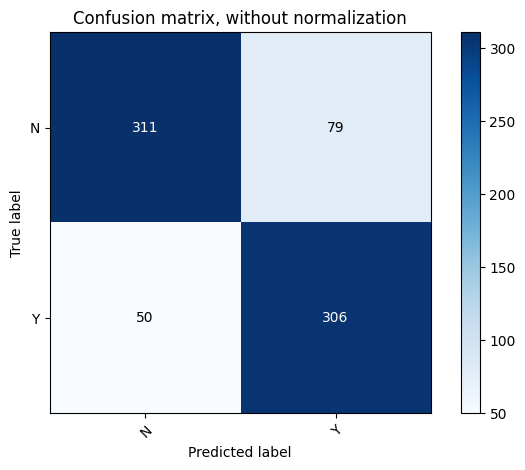

In [84]:

matriz_confusion_arbol= plot_confusion_matrix(y, predictions_arbol,['N','Y'], normalize=False)
matriz_confusion_arbol

En la matriz de confusión, notamos que, a pesar de tener una tasa de aciertos alta, los falsos negativos y positivos son notablemente altos para un modelo destinado al análisis de personas. En resumen, aunque la precisión y la exhaustividad parezcan ser relativamente altas, no consideramos que sean suficientes para su implementación en un entorno empresarial real. Un 10% de falsos positivos implicaría la medicación o tratamiento de un número significativo de individuos que en realidad están sanos. Por último, después de aplicar la validación cruzada para determinar la profundidad del árbol que mejor clasifica los datos, creemos que el uso de un árbol de decisión representa una opción óptima para nuestro problema, basándonos en los datos de precisión y exhaustividad obtenidos.

## 5) Resuelve el mismo problema usando un clasificador k-NN



### 5.1) Preprocesamiento de los datos



Al tener variables con valores dispersos y tratarse de un clasificador k-NN hemos decidido escalar los datos.

In [64]:
scaler = MinMaxScaler()
datos_escalados = scaler.fit_transform(df.drop(columns=['HeartDisease']).values)  # Ajustar y transformar los datos
df_escalado = pd.DataFrame(data=datos_escalados, columns=df.drop(columns=['HeartDisease']).columns)
df_escalado

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,0.0,0.000000,0.444444,0.393822,0.0,0.0,0.774436,0.0,0.015873,0.0
1,0.428571,1.0,0.333333,0.629630,0.183398,0.0,0.0,0.654135,0.0,0.174603,0.5
2,0.183673,0.0,0.000000,0.351852,0.382239,0.0,0.5,0.218045,0.0,0.015873,0.0
3,0.408163,1.0,0.666667,0.425926,0.249035,0.0,0.0,0.293233,1.0,0.253968,0.5
4,0.530612,0.0,0.333333,0.537037,0.212355,0.0,0.0,0.398496,0.0,0.015873,0.0
...,...,...,...,...,...,...,...,...,...,...,...
741,0.346939,0.0,1.000000,0.166667,0.345560,0.0,0.0,0.473684,0.0,0.206349,0.5
742,0.816327,0.0,0.666667,0.481481,0.208494,1.0,0.0,0.541353,0.0,0.555556,0.5
743,0.591837,0.0,0.666667,0.351852,0.088803,0.0,0.0,0.345865,1.0,0.206349,0.5
744,0.591837,1.0,0.000000,0.351852,0.291506,0.0,1.0,0.789474,0.0,0.015873,0.5


### 5.2) Validación cruzada para elegir k 

Aplicamos validación cruzada para elegir el k que mejor generalizará nuestros datos.

In [65]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean_k = []
accuracy_std = []

k_values = range(1,40)
for k in k_values:
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, datos_escalados, y, scoring='accuracy', cv=10)

    accuracy_mean_k.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

print(accuracy_mean_k)

[0.8106666666666668, 0.8106666666666668, 0.8453693693693692, 0.844108108108108, 0.8481081081081081, 0.8440540540540541, 0.8494054054054055, 0.844018018018018, 0.8453513513513513, 0.8466846846846847, 0.8493873873873874, 0.852126126126126, 0.8480900900900901, 0.8521261261261263, 0.8534774774774775, 0.8508108108108108, 0.8521621621621621, 0.8534954954954955, 0.8494774774774776, 0.8494774774774776, 0.8494954954954954, 0.8467927927927927, 0.844126126126126, 0.8414234234234235, 0.8454234234234234, 0.840072072072072, 0.8454234234234234, 0.844108108108108, 0.8413873873873874, 0.8387207207207208, 0.840054054054054, 0.8387387387387386, 0.8414054054054054, 0.840072072072072, 0.840054054054054, 0.8387207207207208, 0.8387207207207208, 0.8414054054054054, 0.840072072072072]


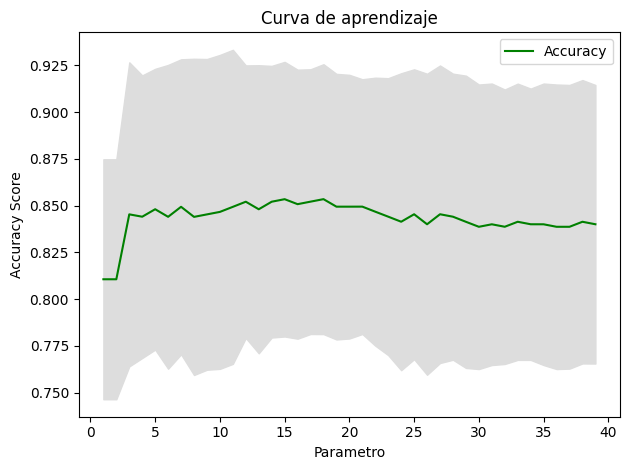

In [66]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean_k, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean_k) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean_k) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
print(np.argmax(accuracy_mean_k))

17


Observamos que el valor optimo de k es 17, y que apartir de 17 la grafica, a pesar de no es exactamente decreciente,en general, si que tiende a decrecer

### 5.3) Estudiando el error

Ahora aplicamos validacion cruzada para evaluar y medir el modelo con la k optima obtenida:

In [68]:
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

clf_k = KNeighborsClassifier(17, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
scores_k = cross_validate(clf_k, datos_escalados,y, scoring=scoring_metrics,
                        cv=10, return_train_score=False)
print('Precisión ponderada media: ',np.mean(scores_k['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores_k['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores_k['test_f1_weighted']))


Precisión ponderada media:  0.8585576120662296
Exhaustividad ponderada media:  0.8521621621621621
F1 ponderado media:  0.85150153464511


Podemos observar que tanto la precisión como la exhaustividad son muy altas por lo que podemos anticipar que el modelo es bastante fiable.

In [69]:

predictions_k = cross_val_predict(clf_k, datos_escalados, y, cv=10)

# Informe por clases
cr_k = classification_report(y, predictions_k, target_names=['N','Y'])
print(cr_k)

              precision    recall  f1-score   support

           N       0.88      0.83      0.85       390
           Y       0.82      0.88      0.85       356

    accuracy                           0.85       746
   macro avg       0.85      0.85      0.85       746
weighted avg       0.85      0.85      0.85       746



Confusion matrix, without normalization
[[323  67]
 [ 43 313]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

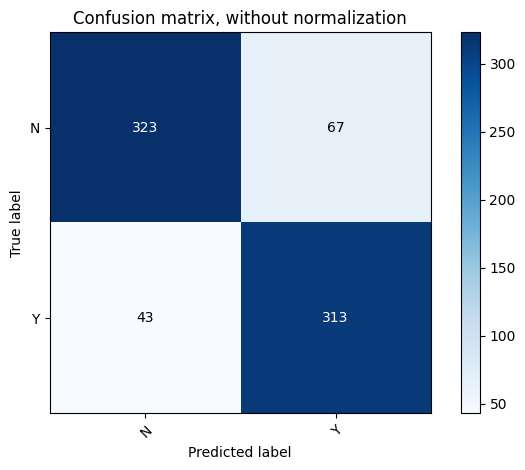

In [81]:
matriz_confusion_k= plot_confusion_matrix(y, predictions_k,['N','Y'], normalize=False)
matriz_confusion_k


Ha habido una mejora con respecto al modelo del arbol de decision; sin embargo, opinamos lo mismo que antes : el modelo el bastante preciso, llegando incluso a tner casi un 90% de precisión en la clase de no enfermos, pero el numero de falsos positivos y falsos negativos es alto teniendo en cuenta que se tratan de personas.

## 6) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


### 6.1) Normalizamos los datos

Como es necesario reescalar los datos para el clasificador MLP, emplearemos los datos del apartado anterior.

### 6.2)Buscamos el mejor coeficiente de regulación para la validación cruzada

In [75]:
import numpy as np

accuracy_mean_MLP = []
accuracy_std_MLP = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

    scores = cross_validate(mlp, datos_escalados, y, scoring='accuracy', cv=10)

    accuracy_mean_MLP.append(np.mean(scores['test_score']))
    accuracy_std_MLP.append(np.std(scores['test_score']))

print(accuracy_mean_MLP)

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.8601621621621621, 0.8521081081081082, 0.8521261261261263, 0.8494954954954954, 0.8481621621621622, 0.8441441441441441, 0.8454774774774775, 0.8441621621621623, 0.8348468468468468, 0.8334954954954956]


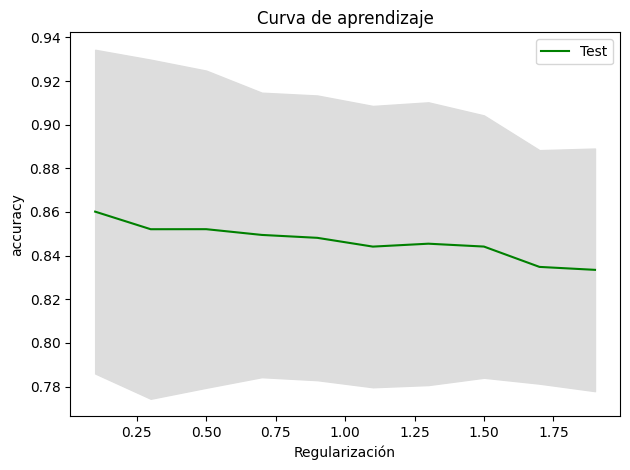

In [76]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean_MLP, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean_MLP) - np.array(accuracy_std_MLP)
upper_limit = np.array(accuracy_mean_MLP) + np.array(accuracy_std_MLP)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos observar en la gráfica que el mejor coeficiente de regulación para nuestro modelo será $\alpha=0.1$

### 6.3) Métricas detalladas por clase

Calculemos la precisión , exhaustividad y la medida F1 de nuestro modelo.

In [77]:
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.1, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=3)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores_mlp = cross_validate(mlp, datos_escalados, y, scoring=scoring_metrics,
                        cv=10, return_train_score=False)
print('Precisión ponderada media: ',np.mean(scores_mlp['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores_mlp['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores_mlp['test_f1_weighted']))

C:\Users\Adrian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión ponderada media:  0.8633342415007661
Exhaustividad ponderada media:  0.8601621621621621
F1 ponderado media:  0.8598521418481863


In [78]:
# Informe por clases
predictions_mlp = cross_val_predict(clf, datos_escalados, y, cv=10)
cr_mlp = classification_report(y, predictions_mlp, target_names=['N','Y'])
print(cr_mlp)

              precision    recall  f1-score   support

           N       0.87      0.82      0.84       390
           Y       0.81      0.86      0.84       356

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



Podemos observar que obtenemos una ligera mayor precisión a la hora de predecir los casos en los que los pacientes son no enfermos, sin embargo, el equilibrio entre precisión y exhaustividad (la medida F1) es igual para ambos casos.

Confusion matrix, without normalization
[[320  70]
 [ 49 307]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

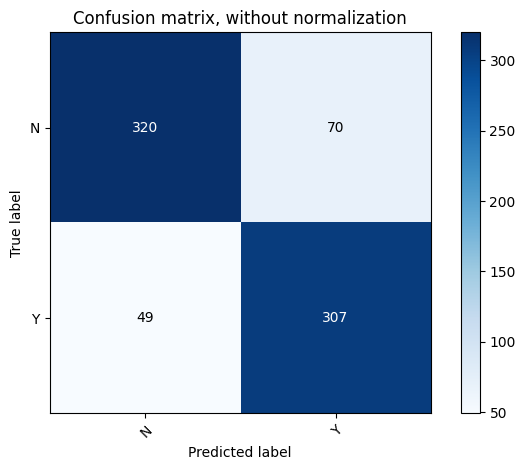

In [80]:

matriz_confusion_mlp = plot_confusion_matrix(y, predictions_mlp,['N','Y'], normalize=False)
matriz_confusion_mlp

En conclusión, podemos observar que ha habido una mejora con respecto a los apartados anteriores en cuanto a precisión y exhaustividad ,sin embargo, el error sigue siendo lo suficientemente alto como para aplicarlo en casos reales.

## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.

- Arbol de decision

In [82]:
print(cr_Arbol)

              precision    recall  f1-score   support

           N       0.86      0.80      0.83       390
           Y       0.79      0.86      0.83       356

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



Confusion matrix, without normalization
[[311  79]
 [ 50 306]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

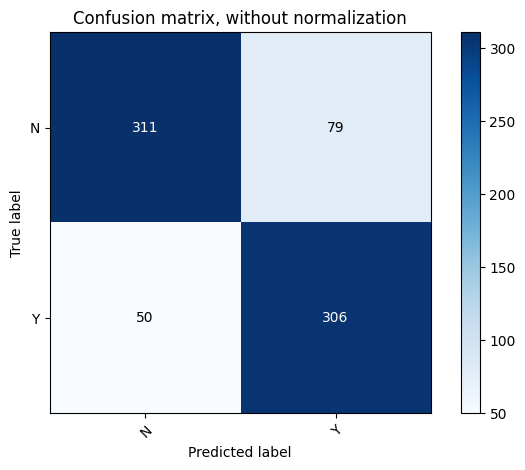

In [87]:
plot_confusion_matrix(y, predictions_arbol,['N','Y'], normalize=False)

- K-NN

In [88]:
print(cr_k)

              precision    recall  f1-score   support

           N       0.88      0.83      0.85       390
           Y       0.82      0.88      0.85       356

    accuracy                           0.85       746
   macro avg       0.85      0.85      0.85       746
weighted avg       0.85      0.85      0.85       746



Confusion matrix, without normalization
[[323  67]
 [ 43 313]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

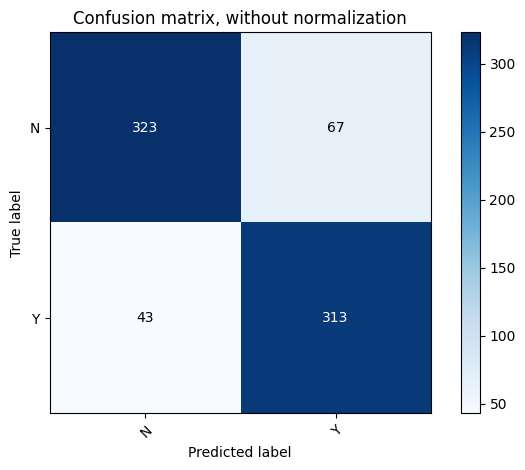

In [89]:
plot_confusion_matrix(y, predictions_k,['N','Y'], normalize=False)

- MLP

In [91]:
print(cr_mlp)

              precision    recall  f1-score   support

           N       0.87      0.82      0.84       390
           Y       0.81      0.86      0.84       356

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



Confusion matrix, without normalization
[[320  70]
 [ 49 307]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

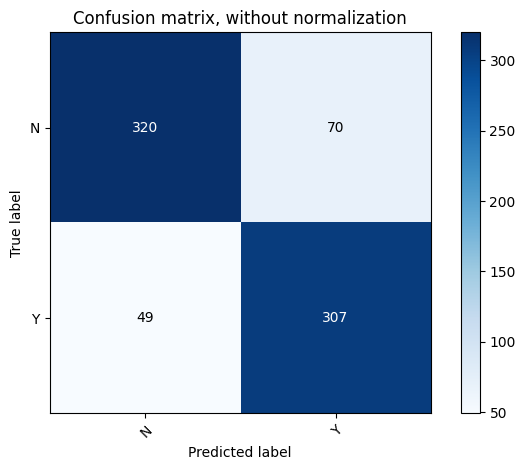

In [92]:
plot_confusion_matrix(y, predictions_mlp,['N','Y'], normalize=False)


Consideramos que el modelo en el que se emplea el clasificador k-NN es el más adecuado debido a su menor incidencia de falsos negativos y falsos positivos en comparación con los modelos de arbol de decisión y el MLP. Aunque es bastante preciso, no estamos convencidos de que pueda ser utilizado directamente en un entorno empresarial real. Sin embargo, creemos que podría ser valioso como una herramienta complementaria. En este caso , observamos un 10% de falsos positivos, lo que equivale a 67 personas. En situaciones extremas, como cuando los médicos están saturados, este modelo podría ser útil para hacer pronósticos sobre los suministros necesarios para intervenir en esas personas, como calcular la cantidad de ciertos medicamentos que se usan para tratar enfermedades del corazón. Esto podría agilizar el trabajo y proporcionar una mayor claridad en el proceso. Después de todo, una precisión del 85% es lo suficientemente elevada para considerar el modelo como una herramienta útil, pero no lo bastante como para realizar diagnósticos fiables.
